## Задание : 
Сделать базовый анализ данных:   
Задание 1: Сделать базовый анализ данных: вывести размерность датасетов, посчитать базовые статистики, выполнить анализ пропусков, сделать выводы;  
Задание 2: Сделать базовый анализ целевой переменной, сделать выводы;  
Задание 3: Построить распределение признаков в зависимости от значения целевой переменной и распределение признаков для обучающей и тестовой выборки (если машина не позволяет построить распределение для всех признаков, то выполнить задание для признаков var_0, var_1, var_2, var_5, var_9, var_10, var_13, var_20, var_26, var_40, var_55, var_80, var_106, var_109, var_139, var_175, var_184, var_196), сделать выводы;  
Задание 4: Построить распределение основных статистики признаков (среднее, стандартное отклонение) в разрезе целевой переменной и распределение основных статистик обучающей и тестовой выборки, сделать выводы;  
Задание 5: Построить распределение коэффициентов корреляции между признаками. Есть ли зависимость между признаками (будем считать, что связь между признаками отсутствует, если коэффициент корреляции < 0.2)?  
Задание 6: Выявить 10 признаков, которые обладают наибольшей нелинейной связью с целевой переменной.  
Задание 7 (опция): Провести анализ идентичности распределения признаков на обучающей и тестовой выборках, сделать выводы.  

Ссылка на наборы данных: https://drive.google.com/file/d/1j8zuKbI-PW5qKwhybP4S0EtugbPqmeyX/view?usp=sharing  

p.s. это обязательная программа для выполнения домашки, вы можете расширить эту программу и сделать больше; я только за :)

### Все самописные функуии и классы используемые в данном задании выведены в отдельный файл, который приложен к заданию classes_and_functions.py

In [1]:
import os, sys
module_path = os.path.abspath(os.path.join(os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from classes_and_functions import PSI,type_features
from typing import List, Optional
from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import scipy.stats as st
from scipy.stats import probplot, ks_2samp

from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted
import missingno as msno
import xgboost as xgb
%matplotlib inline

In [3]:
# Каталог данных
patch = r'D:\train\assignment1_data/'

### Задание 1: Сделать базовый анализ данных: вывести размерность датасетов, посчитать базовые статистики, выполнить анализ пропусков, сделать выводы;  

### Данные их вид и размерность

In [4]:
train = pd.read_csv(patch +'train.csv')
test= pd.read_csv(patch +'test.csv')
target = train['target']

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


In [7]:
train.select_dtypes(include=[np.object]).head(3)

,ID_code
0,train_0
1,train_1
2,train_2


In [8]:
train

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


In [9]:
test

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,test_199995,13.1678,1.0136,10.4333,6.7997,8.5974,-4.1641,4.8579,14.7625,-2.7239,...,2.0544,9.6849,4.6734,-1.3660,12.8721,1.2013,-4.6195,9.1568,18.2102,4.8801
199996,test_199996,9.7171,-9.1462,7.3443,9.1421,12.8936,3.0191,5.6888,18.8862,5.0915,...,5.0071,6.6548,1.8197,2.4104,18.9037,-0.9337,2.9995,9.1112,18.1740,-20.7689
199997,test_199997,11.6360,2.2769,11.2074,7.7649,12.6796,11.3224,5.3883,18.3794,1.6603,...,5.1536,2.6498,2.4937,-0.0637,20.0609,-1.1742,-4.1524,9.1933,11.7905,-22.2762
199998,test_199998,13.5745,-0.5134,13.6584,7.4855,11.2241,-11.3037,4.1959,16.8280,5.3208,...,3.4259,8.5012,2.2713,5.7621,17.0056,1.1763,-2.3761,8.1079,8.7735,-0.2122


In [10]:
numerical_features, int_features, no_int, obj_features,year_feature = type_features(train)

датасет имеет размерность 200000 строк и 202 признаков
числовых значений в датасете 201
в том числе целочисленных 1
в том числе не целочисленных 200
объектных признаков 1
признаков типа время возможно 0


In [11]:
int_features,obj_features

(['target'], ['ID_code'])

####  Выводы:
1. И тест и трейн состоит из 200 000 тысяч строк.   
2. В тесте 201 колнка, соответсвенно в трейне 202 (201+ таргет)  201 цифровые, 1 объект.  
4. Объектная переменная (ID_code) мусорная, дублирует индексы, следует удалить  
5. Остальные признаки float64, непрерывные величины  
6. Так же видно что признаки и данные обезличены и скорее всего прошли какую то обработку

### Посмотрим на базовые статистики

In [5]:
# Для начала удалим мусорный столбец
train.drop('ID_code',axis=1,inplace=True)
test.drop('ID_code',axis=1,inplace=True)

In [13]:
t=test.describe()
t

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


In [14]:
tr = train.describe()
tr

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


#### Отрисуем базовые статистики


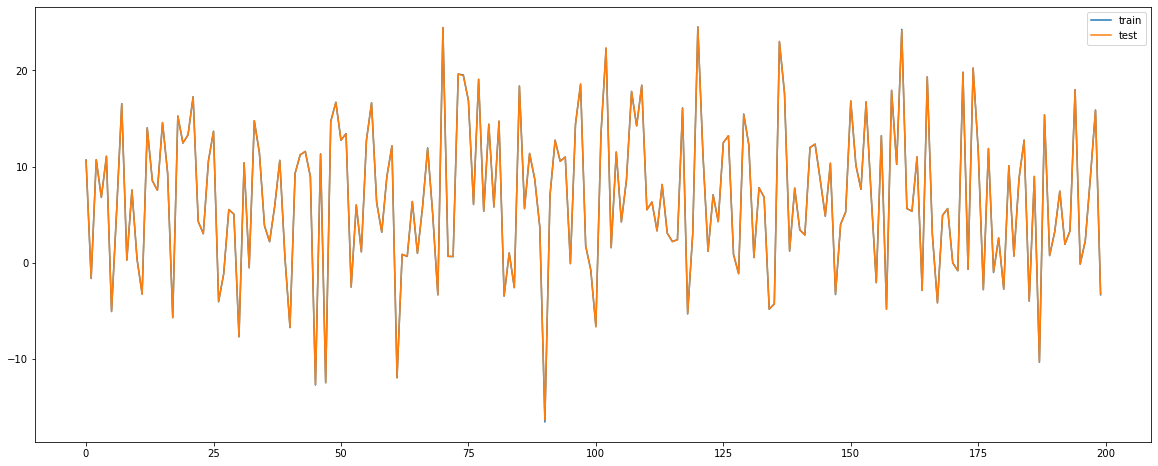

In [15]:
# mean
plt.figure(figsize=(20,8))

plt.plot(np.arange(len(train.columns[1:])),tr.loc['mean'].tolist()[1:],label = 'train')
plt.plot(np.arange(len(test.columns)),t.loc['mean'],label = 'test')
plt.legend()   

Полное наложение средней по всем признакам

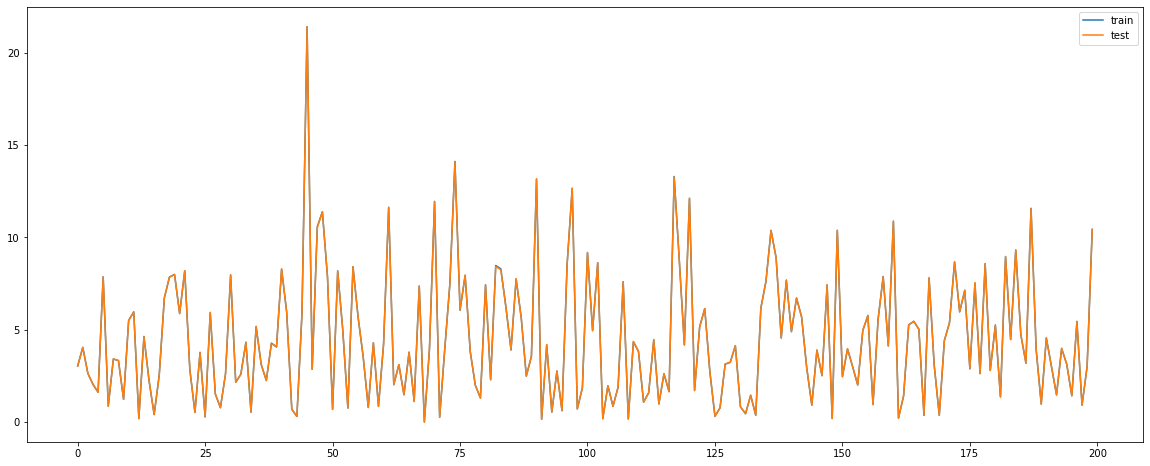

In [16]:
# std
plt.figure(figsize=(20,8))
plt.plot(np.arange(len(train.columns[1:])),tr.loc['std'].tolist()[1:],label = 'train')
plt.plot(np.arange(len(test.columns)),t.loc['std'],label = 'test')
plt.legend() 


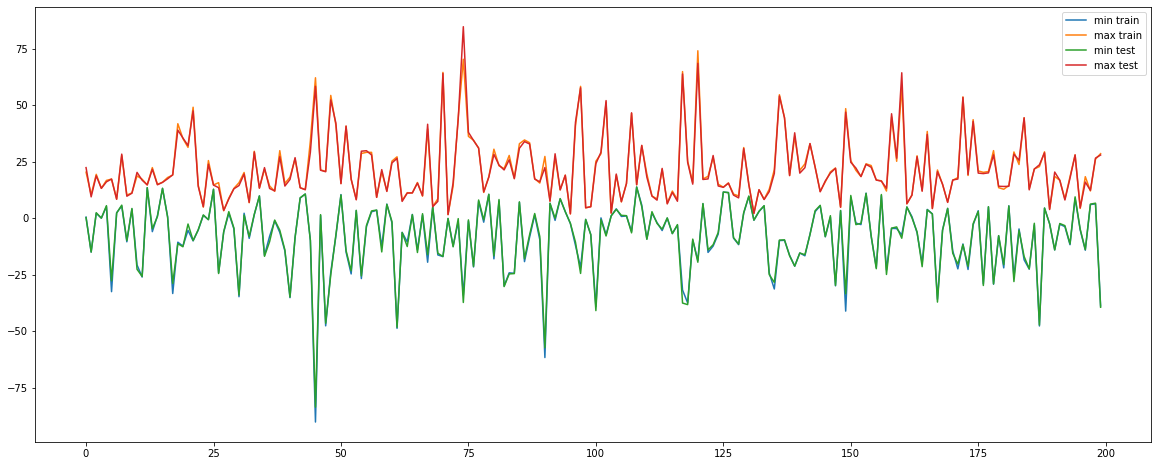

In [17]:
# min ,max
plt.figure(figsize=(20,8))
plt.plot(np.arange(len(train.columns[1:])),tr.loc['min'].tolist()[1:],label = 'min train')
plt.plot(np.arange(len(train.columns[1:])),tr.loc['max'].tolist()[1:],label = 'max train')
plt.plot(np.arange(len(test.columns)),t.loc['min'],label = 'min test')
plt.plot(np.arange(len(test.columns)),t.loc['max'],label = 'max test')
plt.legend() 


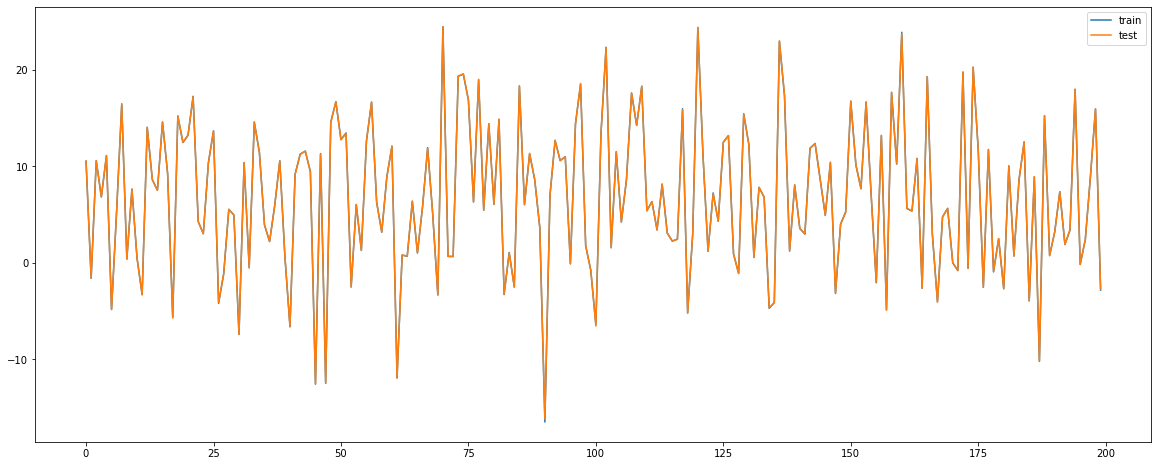

In [18]:
# median
plt.figure(figsize=(20,8))
plt.plot(np.arange(len(train.columns[1:])),tr.loc['50%'].tolist()[1:],label = 'train')
plt.plot(np.arange(len(test.columns)),t.loc['50%'],label = 'test')
plt.legend() 

Как видно базовые статитстик на test и train иделаьно совпадают
Проактически все данные в диапазоне от -50 до 50, есть некоторый заходят от -75 до 75  
std практически у всех не большой, за исключением еденичных случаев



#### Посмотрим на пропуски

<AxesSubplot:>

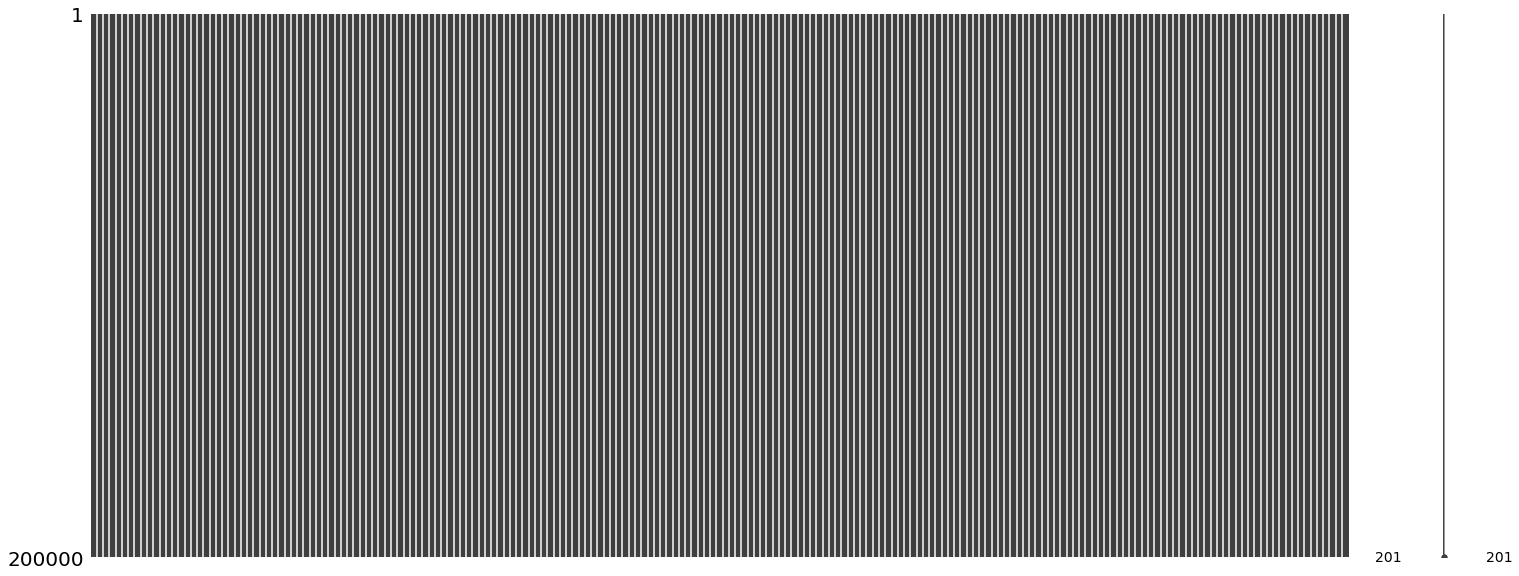

In [19]:
msno.matrix(train)

Пропусков нет вообще, данные можно сказать идеальные

### Задание 2: Сделать базовый анализ целевой переменной, сделать выводы;

In [20]:
target.value_counts(normalize=True)

0    0.89951
1    0.10049
Name: target, dtype: float64

In [21]:
train['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

Таргет бинарный и на 90 % состоит из 0

Если в качестве ответов проствить везде ноль, то 90% ответов будут правильные :). Похоже на скоринг очень строгого банка :)

### Задание 3: Построить распределение признаков в зависимости от значения целевой переменной и распределение признаков для обучающей и тестовой выборки (если машина не позволяет построить распределение для всех признаков, то выполнить задание для признаков var_0, var_1, var_2, var_5, var_9, var_10, var_13, var_20, var_26, var_40, var_55, var_80, var_106, var_109, var_139, var_175, var_184, var_196), сделать выводы;

Распределение признаков в зависмости от значения таргета

In [22]:
columns_for_analys = [ 'var_0', 'var_1', 'var_2', 'var_5',
                      'var_9', 'var_10', 'var_13', 'var_20', 
                      'var_26', 'var_40', 'var_55', 'var_80',
                      'var_106', 'var_109','var_139', 'var_175',
                      'var_184', 'var_196']
len(columns_for_analys )

18

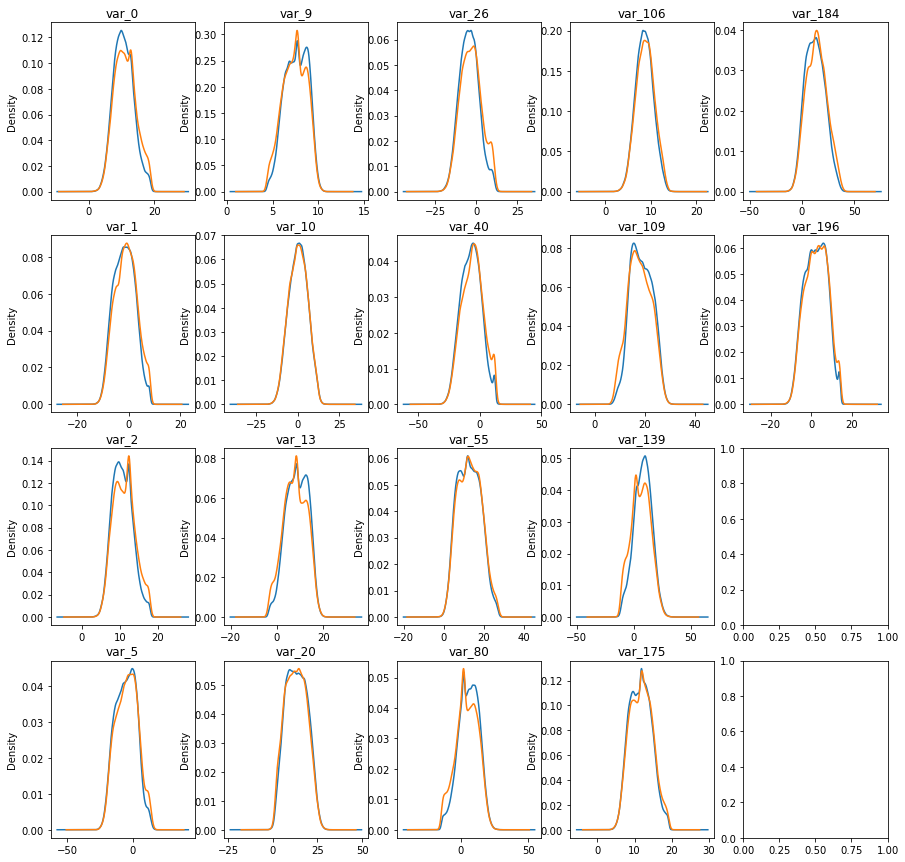

In [23]:
# распределение признаков в зависимости от  таргета
fig, axes = plt.subplots(4, 5, figsize=(15, 15))
for num, i in enumerate(train[columns_for_analys].columns):
    if i in columns_for_analys:
        train[train['target']==0][i].plot.kde(ax = axes[num%4, num//4],title=i )
        train[train['target']==1][i].plot.kde(ax = axes[num%4, num//4],title=i )



Из анализа 18-ти признаков, перспективными кажутся все кроме 10-го
 

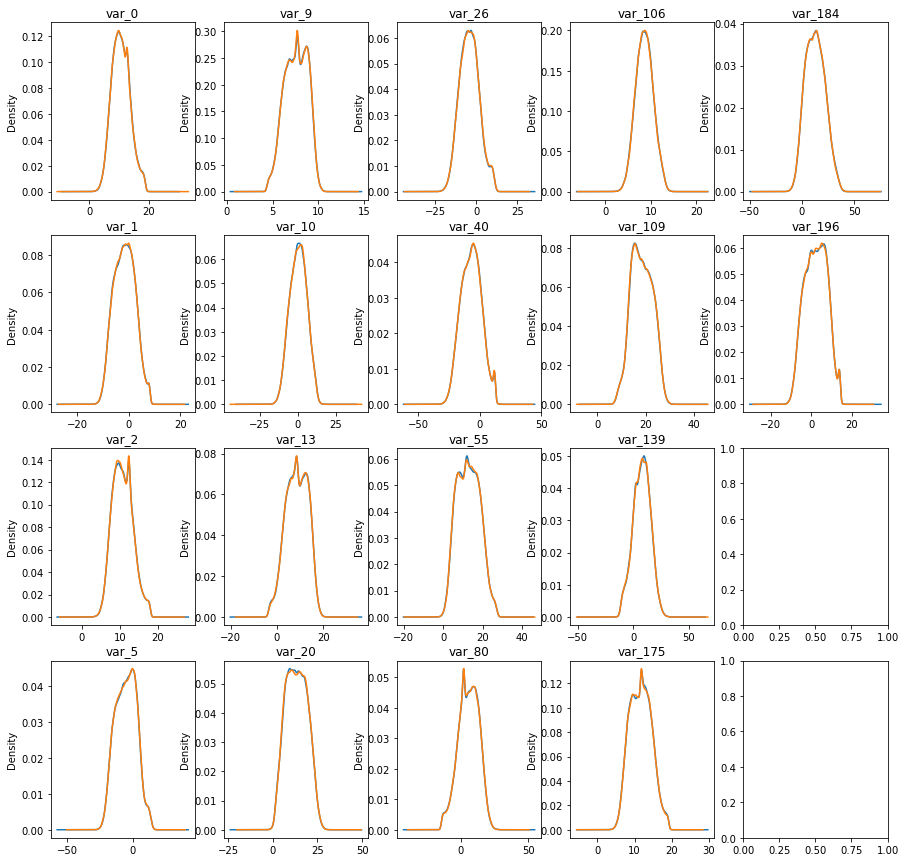

In [23]:
# kde train/test 
fig, axes = plt.subplots(4, 5, figsize=(15, 15))
for num, i in enumerate(train[columns_for_analys].columns):
    if i in columns_for_analys:
        train[i].plot.kde(ax = axes[num%4, num//4],title=i )
        test[i].plot.kde(ax = axes[num%4, num//4],title=i )

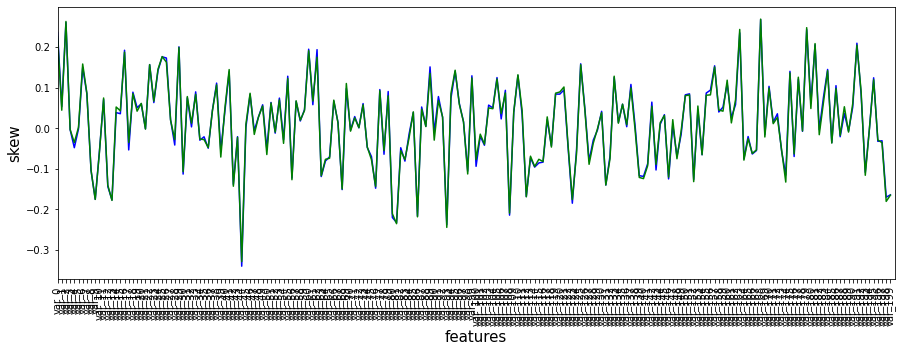

In [24]:
# skew для Train и test
fig = plt.figure(figsize=(15, 5))
train_stats, test_stats = train.drop(['target'],axis=1).skew(), test.skew()
plt.plot(train_stats, color="blue", label="train")
plt.plot(test_stats, color="green", label="test")
plt.xticks(range(train_stats.shape[0]), train_stats.index, rotation=90)
plt.xlabel("features", size=15)
plt.xlim(0, len(train_stats))
plt.ylabel("skew", size=15)
plt.show()

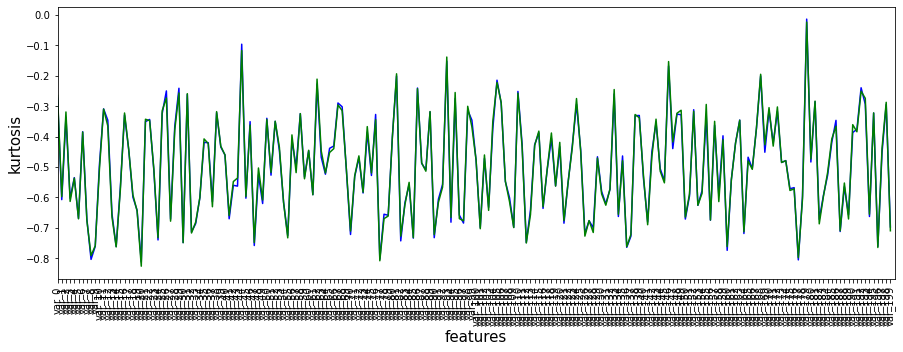

In [25]:
# kurtosis для Train и test
fig = plt.figure(figsize=(15, 5))
train_stats, test_stats = train.drop(['target'],axis=1).kurtosis(), test.kurtosis()
plt.plot(train_stats, color="blue", label="train")
plt.plot(test_stats, color="green", label="test")
plt.xticks(range(train_stats.shape[0]), train_stats.index, rotation=90)
plt.xlabel("features", size=15)
plt.ylabel("kurtosis", size=15)
plt.xlim(0, len(train_stats))
plt.show()

На тесте и на трейне признаки очень похожи. Распределение признаков в зависимости от целевой переменной очень слабо различимо. На большенстве признаков практически не заметно, на некоторых можно найти не большие различия.

### Задание 4: Построить распределение основных статистик признаков (среднее, стандартное отклонение) в разрезе целевой переменной и распределение основных статистик обучающей и тестовой выборки, сделать выводы;

In [26]:
stat_1 = train[train['target']==1].describe()
stat_0 = train[train['target']==0].describe()

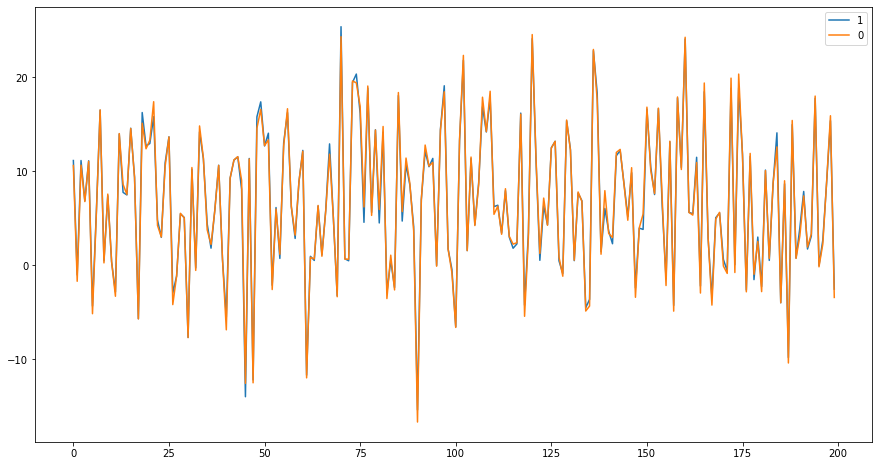

In [27]:
# Средняя по признакам на целевой переменной
plt.figure(figsize=(15,8))
plt.plot(list(range(len(stat_1.columns)-1)),stat_1.loc['mean'].to_list()[1:],label = '1')
plt.plot(list(range(len(stat_0.columns)-1)),stat_0.loc['mean'].to_list()[1:], label = '0')
plt.legend()

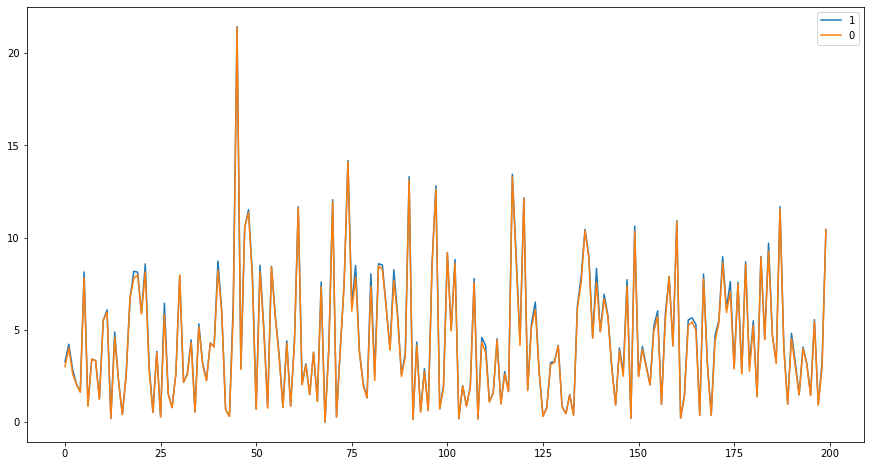

In [28]:
# std по признакам на целевой переменной
plt.figure(figsize=(15,8))
plt.plot(list(range(len(stat_1.columns)-1)),stat_1.loc['std'].to_list()[1:],label = '1')
plt.plot(list(range(len(stat_0.columns)-1)),stat_0.loc['std'].to_list()[1:], label = '0')
plt.legend()

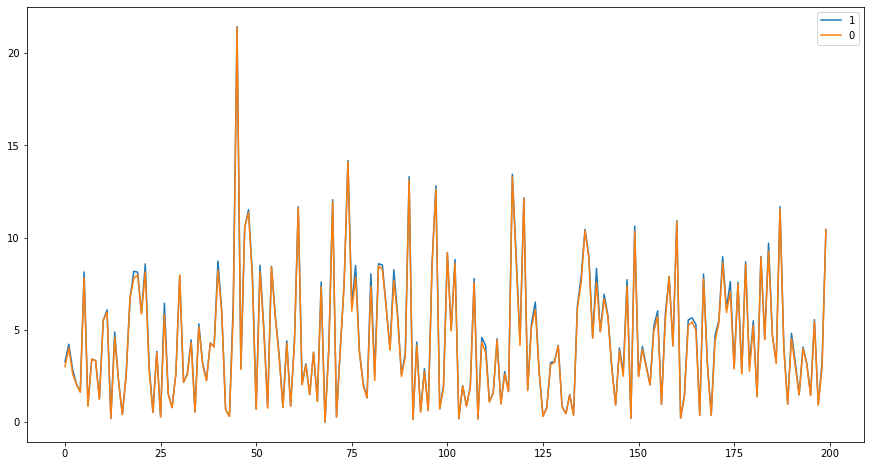

In [29]:
# медиана по признакам на целевой переменной
plt.figure(figsize=(15,8))
plt.plot(list(range(len(stat_1.columns)-1)),stat_1.loc['std'].to_list()[1:],label = '1')
plt.plot(list(range(len(stat_0.columns)-1)),stat_0.loc['std'].to_list()[1:], label = '0')
plt.legend()

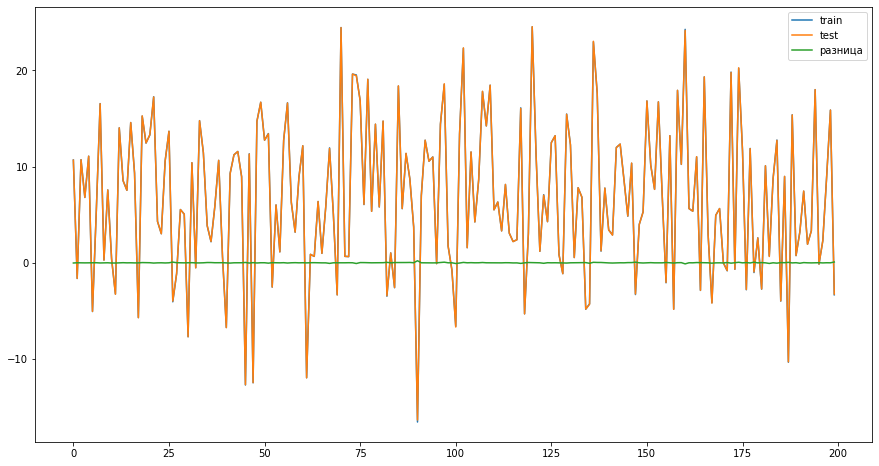

In [30]:
# Средняя по признакам на тесте и на трйне
plt.figure(figsize=(15,8))
plt.plot(list(range(len(tr.columns)-1)),tr.loc['mean'][1:],label = 'train')
plt.plot(list(range(len(t.columns))),t.loc['mean'], label = 'test')
plt.plot(list(range(len(t.columns))),t.loc['mean'] - tr.loc['mean'][1:] , label = 'разница')
plt.legend()

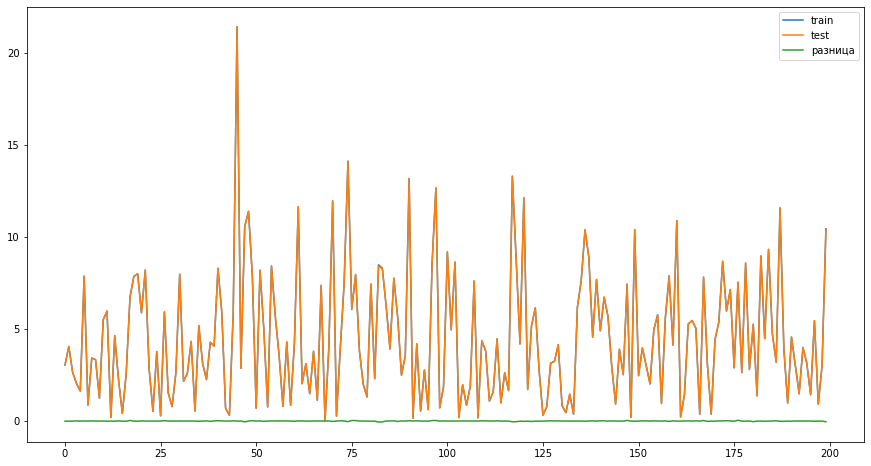

In [32]:
# std по признакам на тесте и на трйне
plt.figure(figsize=(15,8))
plt.plot(list(range(len(tr.columns)-1)),tr.loc['std'][1:],label = 'train')
plt.plot(list(range(len(t.columns))),t.loc['std'], label = 'test')
plt.plot(list(range(len(t.columns))),t.loc['std'] -tr.loc['std'][1:] , label = 'разница')
plt.legend()

Как видно train и test в точнгсти совпадают по mean и std

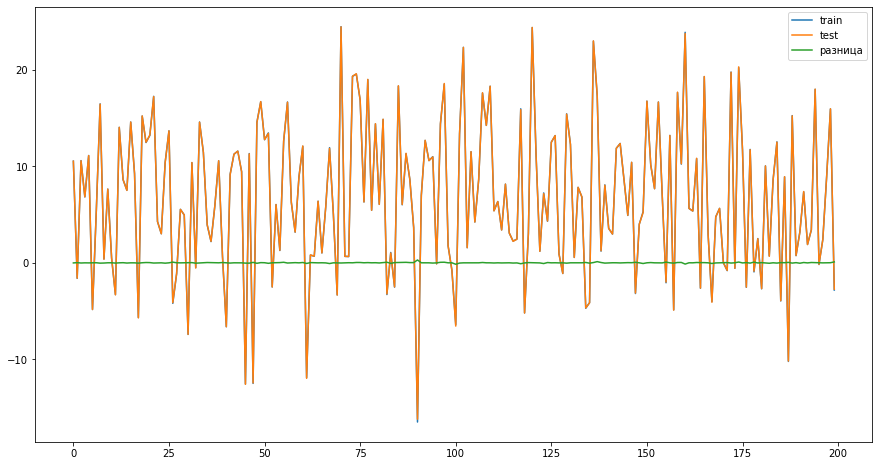

In [33]:
# median по признакам на тесте и на трйне
plt.figure(figsize=(15,8))
plt.plot(list(range(len(tr.columns)-1)),tr.loc['50%'][1:],label = 'train')
plt.plot(list(range(len(t.columns))),t.loc['50%'], label = 'test')
plt.plot(list(range(len(t.columns))),t.loc['50%'] -tr.loc['50%'][1:] , label = 'разница')
plt.legend()

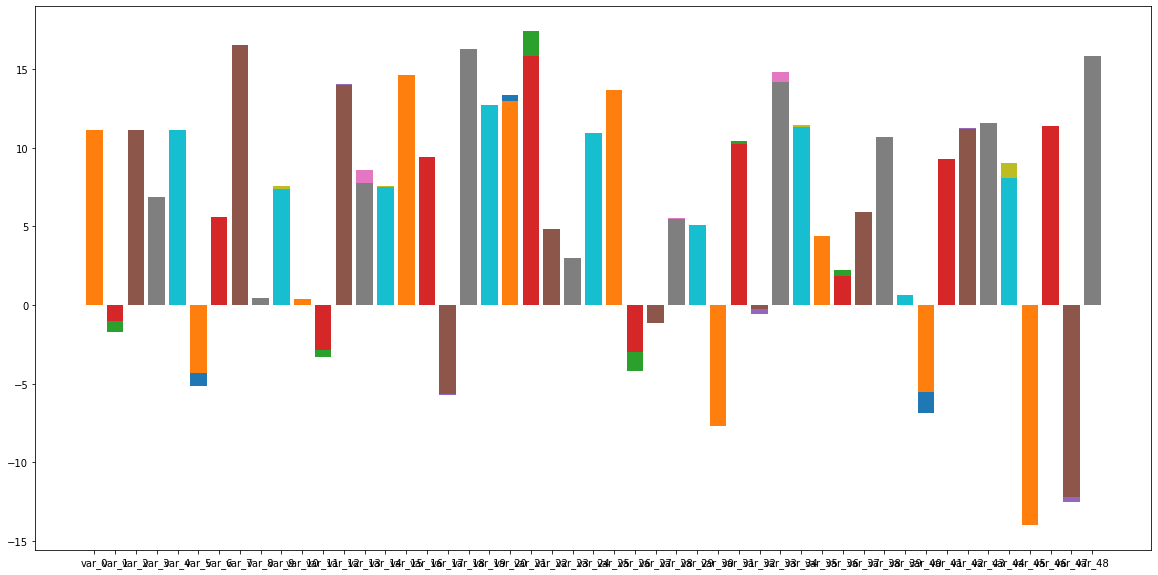

In [34]:
# Первые 50 средних по таргету
plt.figure(figsize=(20,10))
for i in stat_1.columns.to_list()[1:50]:
    plt.bar(i,stat_0.loc['mean',i])
    plt.bar(i,stat_1.loc['mean',i])

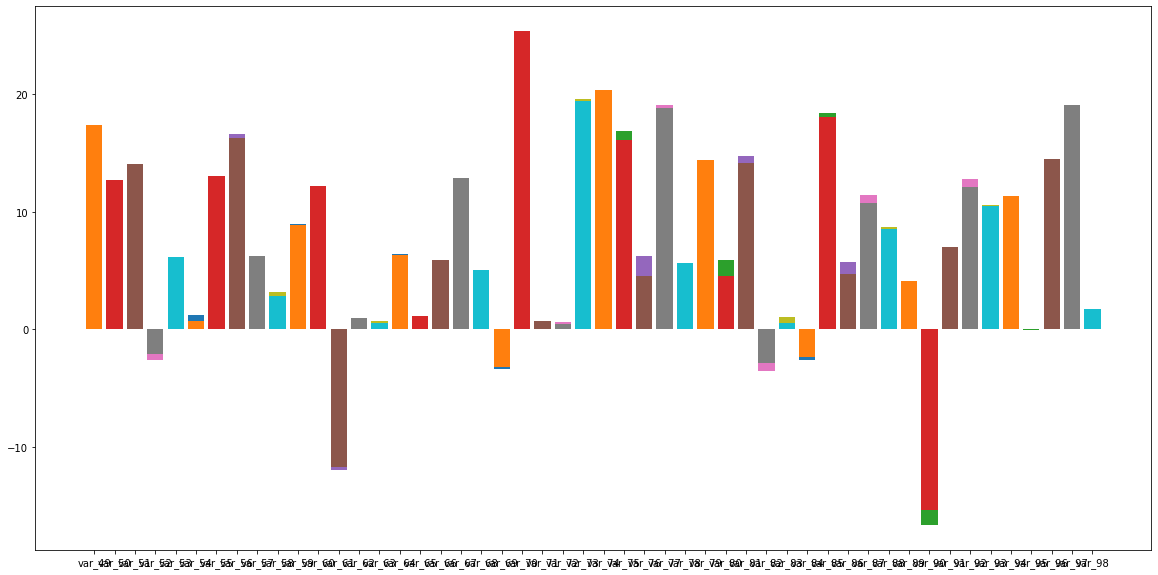

In [35]:
# Вторые 50 средних по таргету
plt.figure(figsize=(20,10))
for i in stat_1.columns.to_list()[50:100]:
    plt.bar(i,stat_0.loc['mean',i])
    plt.bar(i,stat_1.loc['mean',i])

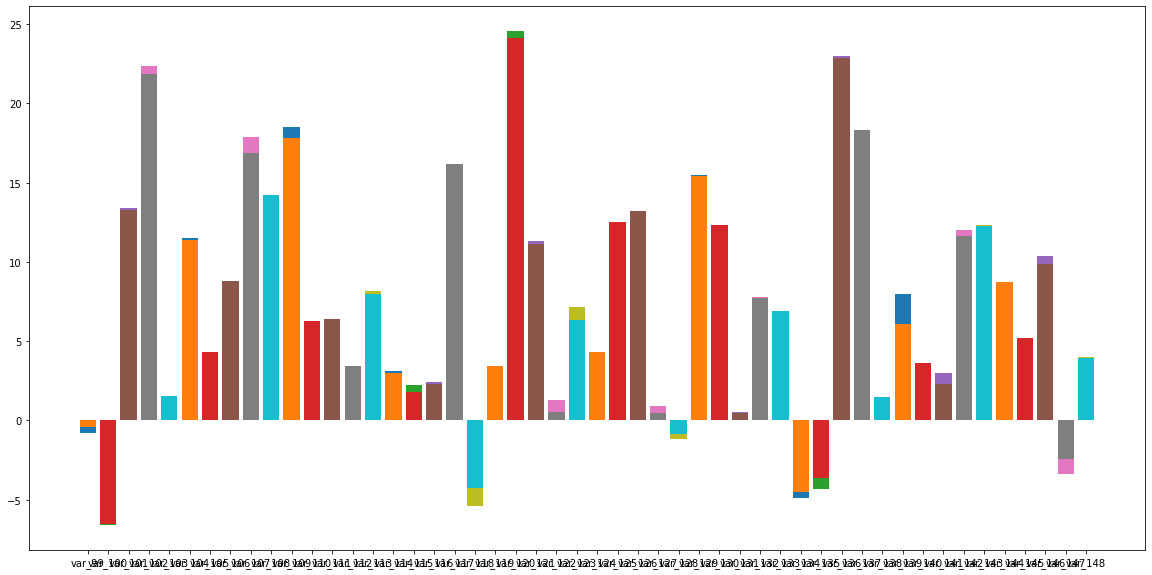

In [36]:
# Третьи 50 средних по таргету
plt.figure(figsize=(20,10))
for i in stat_1.columns.to_list()[100:150]:
    plt.bar(i,stat_0.loc['mean',i])
    plt.bar(i,stat_1.loc['mean',i])

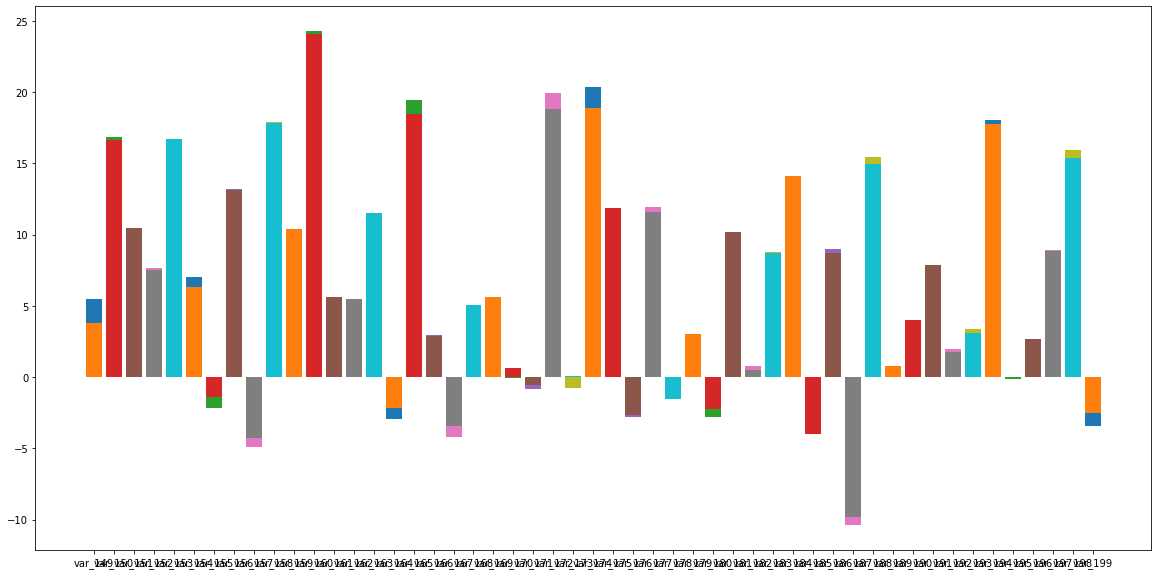

In [37]:
# последгие 50 средних по таргету
plt.figure(figsize=(20,10))
for i in stat_1.columns.to_list()[150:]:
    plt.bar(i,stat_0.loc['mean',i])
    plt.bar(i,stat_1.loc['mean',i])

Как видно средние значения по разным таргетам в большенстве примерно одинаковые, имеются некторые признаки где есть отличия до 25

### Задание 5: Построить распределение коэффициентов корреляции между признаками. Есть ли зависимость между признаками (будем считать, что связь между признаками отсутствует, если коэффициент корреляции < 0.2)?

In [38]:
correlation = train.corr()

In [39]:
correlation

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
target,1.000000,0.052390,0.050343,0.055870,0.011055,0.010915,0.030979,0.066731,-0.003025,0.019584,...,0.055973,0.047114,-0.042858,-0.017709,-0.022838,0.028285,0.023608,-0.035303,-0.053000,0.025434
var_0,0.052390,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,...,0.002752,0.000206,-0.005373,0.001616,-0.001514,0.002073,0.004386,-0.000753,-0.005776,0.003850
var_1,0.050343,-0.000544,1.000000,0.003980,0.000010,0.000303,-0.000902,0.003258,0.001511,0.004098,...,0.006627,0.003621,-0.002604,0.001153,-0.002557,-0.000785,-0.000377,-0.004157,-0.004861,0.002287
var_2,0.055870,0.006573,0.003980,1.000000,0.001001,0.000723,0.001569,0.000883,-0.000991,0.002648,...,0.000197,0.001285,-0.003400,0.000549,0.002104,-0.001070,0.003952,0.001078,-0.000877,0.003855
var_3,0.011055,0.003801,0.000010,0.001001,1.000000,-0.000322,0.003253,-0.000774,0.002500,0.003553,...,0.000151,0.002445,-0.001530,-0.001699,-0.001054,0.001206,-0.002800,0.001164,-0.001651,0.000506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
var_195,0.028285,0.002073,-0.000785,-0.001070,0.001206,0.003706,-0.001274,0.001244,0.001854,0.001396,...,0.004571,0.000870,-0.004745,-0.003143,-0.001201,1.000000,0.002517,-0.004170,-0.000536,0.002042
var_196,0.023608,0.004386,-0.000377,0.003952,-0.002800,0.000513,0.002880,0.005378,0.001045,-0.003242,...,-0.000847,0.002466,-0.001386,-0.005308,-0.005040,0.002517,1.000000,-0.000454,0.000253,0.000607
var_197,-0.035303,-0.000753,-0.004157,0.001078,0.001164,-0.000046,-0.000535,-0.003565,0.003466,-0.004583,...,-0.004974,0.000906,-0.000527,0.005068,0.000884,-0.004170,-0.000454,1.000000,0.001183,0.004991
var_198,-0.053000,-0.005776,-0.004861,-0.000877,-0.001651,-0.001821,-0.000953,-0.003025,0.000650,0.002950,...,-0.000153,-0.000067,0.003451,0.001646,0.003194,-0.000536,0.000253,0.001183,1.000000,-0.004731


In [40]:
flag = True
for i in correlation:
    d = correlation[(correlation[i].apply(abs)>0.2)&(correlation[i]<1)][i]
    if len(d)>0:
        print(d)
        flag=False
if flag:
    print('Нет признаков с корреляцией более 0,2')   

Нет признаков с корреляцией более 0,2


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

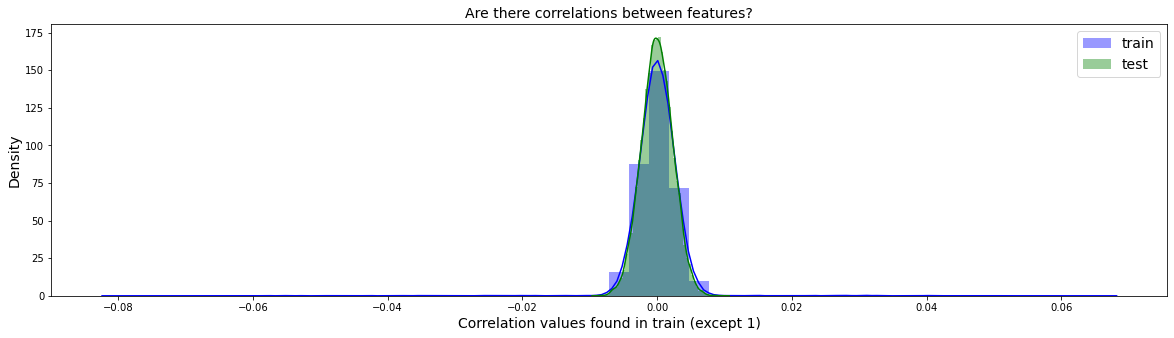

In [41]:
train_correlations = correlation
train_correlations = train_correlations.values.flatten()
train_correlations = train_correlations[train_correlations != 1]

columns = correlation.columns.tolist()
columns.remove("target")

test_correlations = test[columns].corr()
test_correlations = test_correlations.values.flatten()
test_correlations = test_correlations[test_correlations != 1]

plt.figure(figsize=(20,5))
sns.distplot(train_correlations, color="Blue", label="train")
sns.distplot(test_correlations, color="Green", label="test")

plt.xlabel("Correlation values found in train (except 1)", size=14)
plt.title("Are there correlations between features?", size=14)
plt.legend(loc="best", fontsize=14)
plt.ylabel("Density", size=14)

Корреляция признаков на train и на test почти совпадает

<AxesSubplot:title={'center':'Correlation'}>

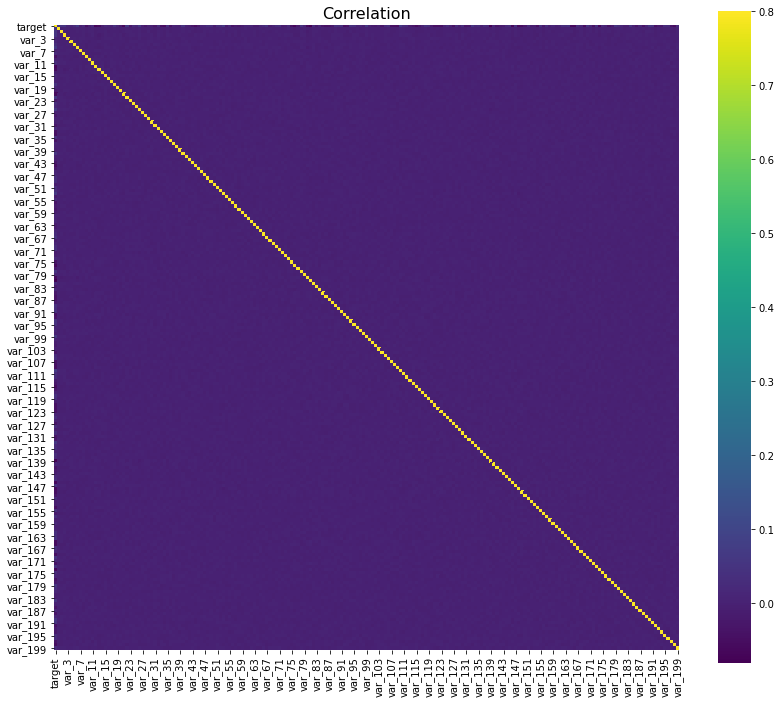

In [42]:
fig, axes = plt.subplots(figsize = (14,12))
plt.title("Correlation", y=1, size=16)
sns.heatmap(correlation, square=True, vmax=0.8, cmap="viridis")

Как видно полностью отсутвует

### Задание 6: Выявить 10 признаков, которые обладают наибольшей нелинейной связью с целевой переменной.

Проведем анализ с какой долей точности каждый признак может идентифицировать таргет. Особенно нас инстересует таргет равныйй единице, посольку его всего 10%

In [43]:
# Уникальное число значений в каждом признаке
all_uniq = set(train['var_1'])
# Уникальное число значение признака для таргета равного 0 и 1
uniq_for_1=set(train[train['target']==1]['var_1'].to_list())
uniq_for_0 = set(train[train['target']==0]['var_1'].to_list())

a = uniq_for_1.intersection(uniq_for_0)
   # уникальные значения для 0 и 1
uniq_for_0 =  uniq_for_0 - a
uniq_for_1 =  uniq_for_1 - a
# Доля уникальных значений для нуля и 1 от общего знчения уникальных значений
part_uniq_for_0 = len(uniq_for_0) /len(all_uniq)
part_uniq_for_1 = len(uniq_for_1) /len(all_uniq)
          
print(f'доля уникальных значений для 0  {part_uniq_for_0: .4f},доля уникальных значений для 1 {part_uniq_for_1: .4f}')

доля уникальных значений для 0   0.8279,доля уникальных значений для 1  0.0555


In [44]:
analis_uniq_features = pd.DataFrame(columns=['all_uniq','uniq_for_1','uniq_for_0','part_uniq_for_0','part_uniq_for_1'])
for  i in train.columns.to_list()[2:]:
    all_uniq = set(train[i])
    uniq_for_1=set(train[train['target']==1][i].to_list())
    uniq_for_0 = set(train[train['target']==0][i].to_list())
#     пересечение значений для 1 и 0
    a = uniq_for_1.intersection(uniq_for_0)
   # уникальные значения для 0 и 1
    uniq_for_0 =  uniq_for_0 - a
    uniq_for_1 =  uniq_for_1 - a
    # Доля уникальных значений для нуля и 1 от общего знчения уникальных значений
    part_uniq_for_0 = len(uniq_for_0) /len(all_uniq)
    part_uniq_for_1 = len(uniq_for_1) /len(all_uniq)
    analis_uniq_features.loc[i]=[len(all_uniq),len(uniq_for_1),len(uniq_for_0),part_uniq_for_0,part_uniq_for_1]

In [45]:
analis_uniq_features.sort_values('part_uniq_for_1',ascending=False).head(10)

,all_uniq,uniq_for_1,uniq_for_0,part_uniq_for_0,part_uniq_for_1
var_45,169968.0,14676.0,150213.0,0.883772,0.086346
var_117,164469.0,13823.0,144800.0,0.880409,0.084046
var_74,161058.0,13282.0,141418.0,0.878056,0.082467
var_61,159369.0,12928.0,139741.0,0.876839,0.081120
var_97,158739.0,12857.0,139111.0,0.876350,0.080995
var_90,157210.0,12568.0,137605.0,0.875294,0.079944
var_136,156615.0,12487.0,137016.0,0.874859,0.079731
var_120,158269.0,12605.0,138669.0,0.876160,0.079643
var_187,157031.0,12437.0,137457.0,0.875349,0.079201
var_160,156274.0,12273.0,136771.0,0.875200,0.078535


Первые 10 признаков, которые лучше всего разделяют целевую переменную

Воспользуемся случайным лесом, для выявления наииболее важных признаков

In [46]:
%%time
parameters = {"max_depth": 12, 'min_samples_leaf' :3, "n_estimators": 250, "random_state": 27, "n_jobs": -1}

forest = RandomForestRegressor(**parameters)
forest.fit(train.drop("target", axis=1), target)

Wall time: 11min 1s


RandomForestRegressor(max_depth=12, min_samples_leaf=3, n_estimators=250,
                      n_jobs=-1, random_state=27)

In [47]:
# Посмотрим насколько качественный результат
pred = forest.predict(train.drop("target", axis=1))

In [48]:
roc_auc_score(target,pred),accuracy_score(target,pred>=0.23)

(0.8590295488316961, 0.944695)

Text(0.5, 1.0, 'What are the top important features to start with?')

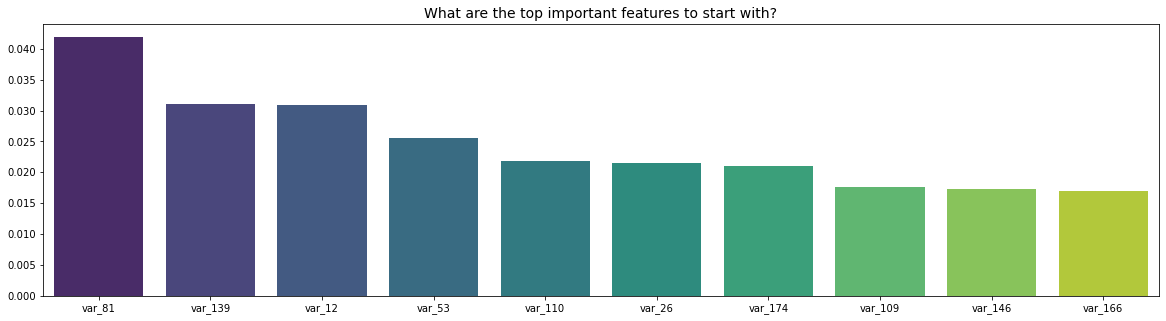

In [49]:
n_top = 10
importances = forest.feature_importances_
idx = np.argsort(importances)[-1:-n_top-1:-1]
feature_names = train.drop("target", axis=1).columns

plt.figure(figsize=(20, 5))
sns.barplot(x=feature_names[idx], y=importances[idx], palette="viridis")
plt.title("What are the top important features to start with?", size=14)

In [50]:
%%time
model = xgb.XGBClassifier()
model.fit(train.drop(["target"], axis=1), target)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:50:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 54 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [51]:
pred = model.predict_proba(train.drop("target", axis=1))[:,1]
roc_auc_score(target,pred),accuracy_score(target,pred>=0.3)

(0.9732738238234037, 0.964115)

Text(0.5, 1.0, 'What are the top important features to start with?')

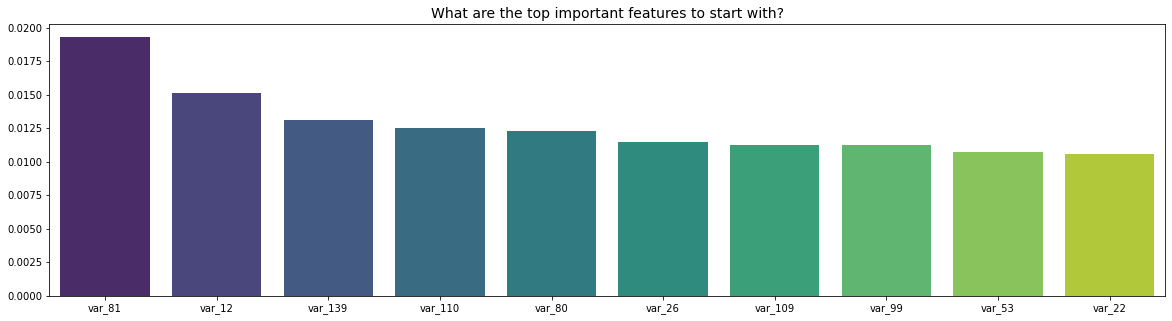

In [52]:
n_top = 10
importances = model.feature_importances_
idx = np.argsort(importances)[-1:-n_top-1:-1]
feature_names = train.drop(["target"], axis=1).columns

plt.figure(figsize=(20, 5))
sns.barplot(x=feature_names[idx], y=importances[idx], palette="viridis")
plt.title("What are the top important features to start with?", size=14)

Важность переменных похожа на случаном леcе и бустиге. Но точность маловата, так как она близка к распределению таргета. Попробуем уровновешать данные, путем удаления части нулевых решений

In [6]:
zero_data_idx = train[train.target==0].index
zero_data_idx = np.random.choice(zero_data_idx,size = 180000)

In [7]:
n_train = train.drop(zero_data_idx,axis=0)

In [8]:
n_train.target.value_counts(normalize=True),n_train.shape

(0    0.76712
 1    0.23288
 Name: target, dtype: float64,
 (86302, 201))

Попробуем то же самое на новых данных

In [56]:
forest = RandomForestRegressor(**parameters)
forest.fit(n_train.drop("target", axis=1), target.drop(zero_data_idx))


RandomForestRegressor(max_depth=12, min_samples_leaf=3, n_estimators=250,
                      n_jobs=-1, random_state=27)

In [57]:
pred = forest.predict(train.drop('target',axis = 1))
roc_auc_score(target,pred),accuracy_score(target,pred>=0.45)

(0.8567637911428694, 0.933715)

Text(0.5, 1.0, 'What are the top important features to start with?')

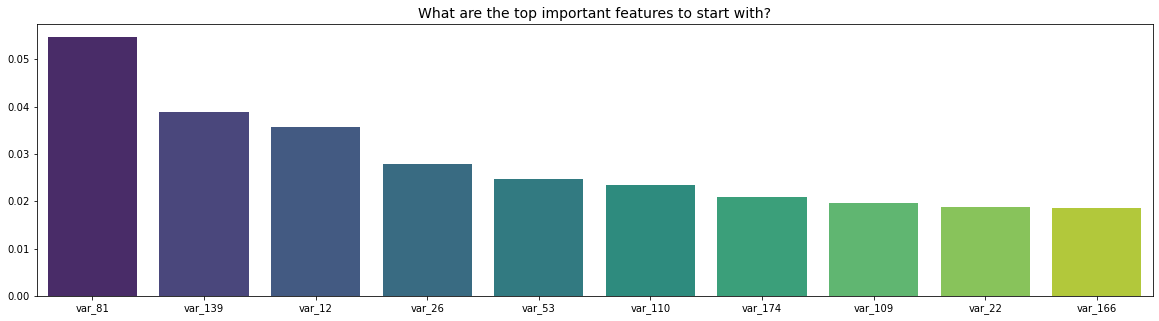

In [59]:
n_top = 10
importances = forest.feature_importances_
idx = np.argsort(importances)[-1:-n_top-1:-1]
feature_names = train.drop("target", axis=1).columns

plt.figure(figsize=(20, 5))
sns.barplot(x=feature_names[idx], y=importances[idx], palette="viridis")
plt.title("What are the top important features to start with?", size=14)

In [9]:
%%time
model = xgb.XGBClassifier()
model.fit(n_train.drop(["target"], axis=1), target.drop(zero_data_idx))


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:02:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 24.5 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [10]:
pred = model.predict_proba(train.drop("target", axis=1))[:,1]
roc_auc_score(target,pred),accuracy_score(target,pred>=0.55)

(0.966696106721117, 0.94915)

Text(0.5, 1.0, 'What are the top important features to start with?')

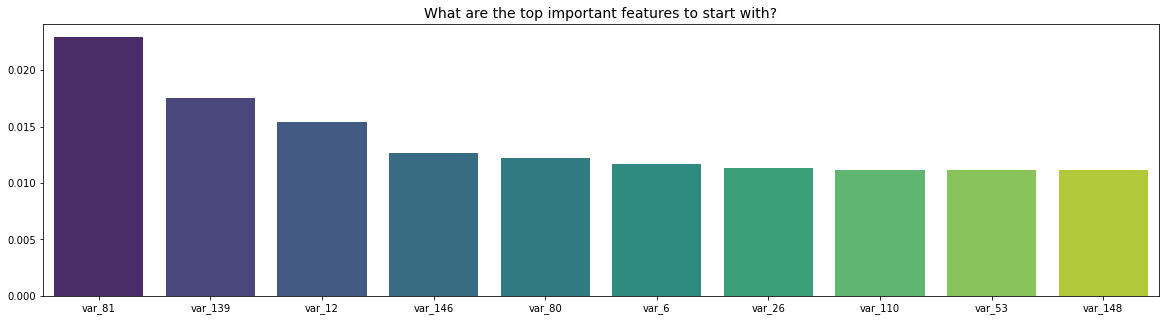

In [11]:
n_top = 10
importances = model.feature_importances_
idx = np.argsort(importances)[-1:-n_top-1:-1]
feature_names = train.drop(["target"], axis=1).columns

plt.figure(figsize=(20, 5))
sns.barplot(x=feature_names[idx], y=importances[idx], palette="viridis")
plt.title("What are the top important features to start with?", size=14)

Немного изминилась рсстановка

#### Задание 7: Провести анализ идентичности распределения признаков на обучающей и тестовой выборках, сделать выводы.

Kolmogorov-Smirnov Test

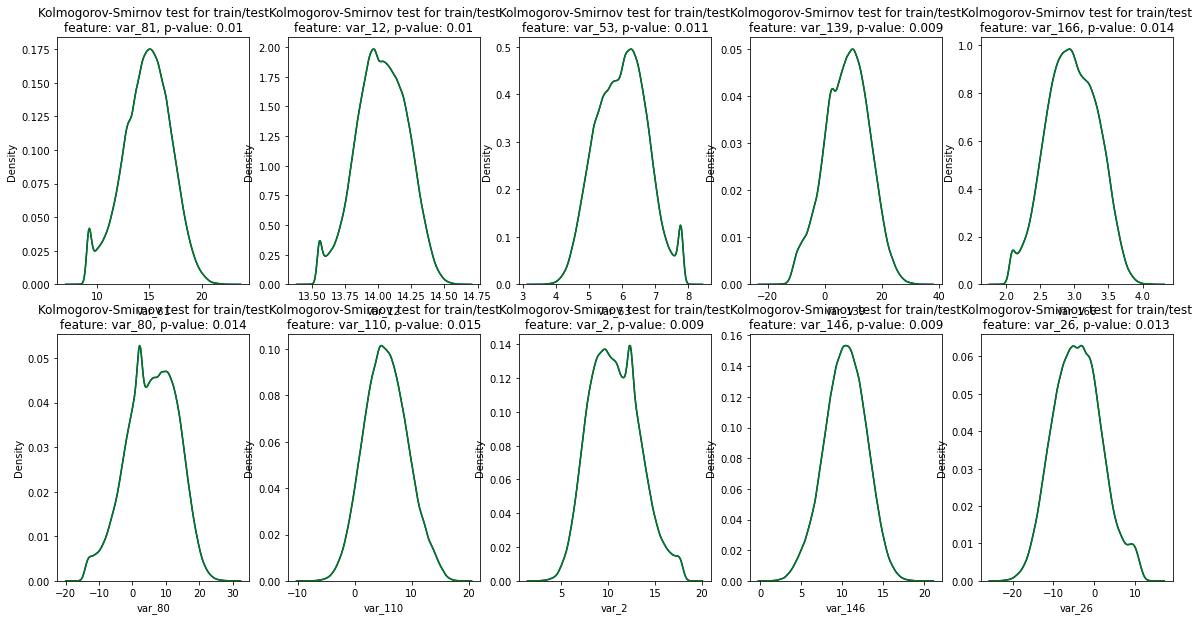

In [63]:
statistics_array = []
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for num, feature in enumerate(feature_names[idx]):
    statistic, pvalue = ks_2samp(
        train[feature].sample(10000), test[feature].sample(10000)
    )
    statistics_array.append(statistic)

    sns.kdeplot(train[feature], ax=axes[num//5, num%5], color="Blue", label="Train")
    sns.kdeplot(train[feature], ax=axes[num//5, num%5], color="Green", label="Test")

    axes[num//5, num%5].set_title(
        (f"Kolmogorov-Smirnov test for train/test\n"
        f"feature: {feature}, p-value: {round(statistic, 3)}")
    )

Как видно альтернативная идея везде отвергается

Population Stability Index

In [6]:
features_to_score = train.drop([ "target"], axis=1).columns.tolist()
psi = PSI(threshold=0.01)

In [7]:
psi.fit_transform(
    X=train[features_to_score],
    y=test[features_to_score]
)

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:12<00:00, 16.11it/s]


,Variable,PSI,Selected
0,var_154,0.000085,1
1,var_156,0.000132,1
2,var_5,0.000138,1
3,var_148,0.000150,1
4,var_35,0.000151,1
...,...,...,...
195,var_124,0.000615,1
196,var_79,0.000628,1
197,var_162,0.000639,1
198,var_29,0.000667,1


## Adversarial Validation

In [8]:
X_adv = pd.concat([train[features_to_score], test[features_to_score]])
y_adv = np.hstack(
    (np.ones(train.shape[0]), np.zeros(test.shape[0])))

X_adv = X_adv.reset_index(drop=True)

In [9]:
%%time
parameters = {"max_depth": 10, "n_estimators": 150, "random_state": 27, "n_jobs": -1}
model = xgb.XGBClassifier(**parameters)

cv = cross_val_score(
    estimator=model,
    X=X_adv, y=y_adv,
    scoring="roc_auc",
    cv=KFold(n_splits=5, shuffle=True, random_state=27)
)

print(f"CV-score: {round(np.mean(cv), 4)}")

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:08:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:11:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:14:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:17:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:19:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CV-score: 0.5116
Wall time: 14min 29s


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:22:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Text(0.5, 1.0, 'Top Importance Features for Adversarial Validation (train vs test)')

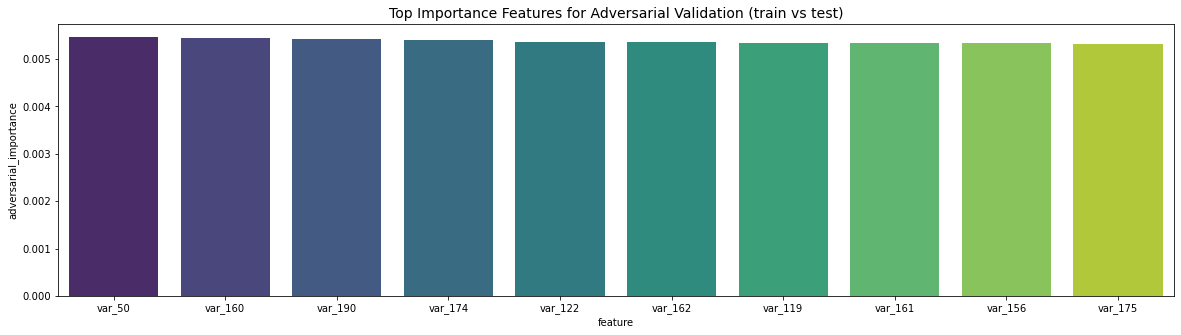

In [10]:
model.fit(X_adv, y_adv)

importance = pd.DataFrame({
    "feature": X_adv.columns,
    "adversarial_importance": model.feature_importances_
})
importance = importance.sort_values(by="adversarial_importance", ascending=False)
importance = importance.head(n=10)

plt.figure(figsize=(20, 5))
sns.barplot(x=importance["feature"], y=importance["adversarial_importance"], palette="viridis")
plt.title("Top Importance Features for Adversarial Validation (train vs test)", size=14)

Как вижно roc auc на крос валидации почти 0,5, что говорит о том, что модель не может обнарудить различия в данных на тесте и трейне. Идельная ситуация